<a href="https://colab.research.google.com/github/2303A52060/23CSBTB39-40/blob/main/AIML_ASSIGNMENT_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME:M.BHARATH,

ROLL NO:2303A52060,

BATCH NO:39.

Assignment-8

Random forest

In [22]:
# 1. Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the Lending Data
data = pd.read_csv('lending_data.csv')

# 3. Display Basic Information about the Dataset
print("First 5 rows of the dataset:")
print(data.head())

print("\nData Types of Each Feature:")
print(data.dtypes)

print("\nSummary Statistics:")
print(data.describe())

print("\nColumns in the dataset:")
print(data.columns.tolist())

# List of features used for prediction
features = [
    'credit.policy',
    'int.rate',
    'installment',
    'log.annual.inc',
    'dti',
    'fico',
    'days.with.cr.line',
    'revol.bal',
    'revol.util'
]
print("\nFeatures considered for prediction:")
print(features)


First 5 rows of the dataset:
   credit.policy  int.rate  installment  log.annual.inc   dti  fico  \
0              1     0.085        300.0            10.5  15.2   720   
1              1     0.095        450.0            11.2  18.4   690   
2              0     0.120        200.0             9.8  25.6   650   
3              1     0.075        350.0            10.9  12.3   740   
4              1     0.100        500.0            11.5  20.1   710   

   days.with.cr.line  revol.bal  revol.util  loan_repaid             purpose  
0               1200       1500        0.30            1  debt_consolidation  
1                800       2000        0.40            1    home_improvement  
2                400       1000        0.50            0            personal  
3               1500       1200        0.20            1  debt_consolidation  
4                600       1800        0.35            1             wedding  

Data Types of Each Feature:
credit.policy          int64
int.rate    

Data Types of Each Feature:
credit.policy          int64
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line      int64
revol.bal              int64
revol.util           float64
loan_repaid            int64
purpose               object
dtype: object
Summary Statistics:
       credit.policy  int.rate  installment  log.annual.inc        dti  \
count        8.00000  8.000000      8.00000          8.0000   8.000000   
mean         0.75000  0.101875    331.87500         10.6375  20.037500   
std          0.46291  0.020863    114.57803          0.7891   5.955775   
min          0.00000  0.075000    180.00000          9.2000  12.300000   
25%          0.75000  0.088750    256.25000         10.3250  15.650000   
50%          1.00000  0.097500    325.00000         10.8000  19.250000   
75%          1.00000  0.112500    412.50000         11.2250  23.275000   
90%          1.00000  0.126

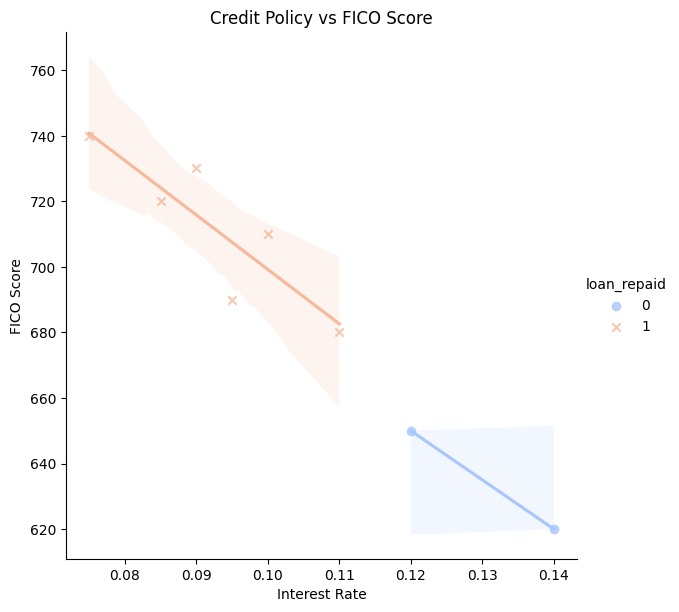

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the cleaned dataset
data = pd.read_csv('lending_data.csv')

# 2. Check the data types of each feature
data_types = data.dtypes
print("Data Types of Each Feature:")
print(data_types)

# 3. Generate summary statistics
summary_stats = data.describe(percentiles=[.25, .5, .75, .90])
print("Summary Statistics:")
print(summary_stats)

# 4. List the names of columns/features in the dataset
column_names = data.columns.tolist()
print("Column Names:")
print(column_names)

# 5. Display the count of credit approvals
credit_approvals_count = data['loan_repaid'].value_counts()
print("Count of Credit Approvals:")
print(credit_approvals_count)

# 6. Generate lmplot to verify trends between not fully paid and credit policy
sns.lmplot(data=data, x='int.rate', y='fico', hue='loan_repaid',
           markers=["o", "x"], palette='coolwarm', height=6)
plt.title('Credit Policy vs FICO Score')
plt.xlabel('Interest Rate')
plt.ylabel('FICO Score')
plt.show()


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Load the cleaned dataset
data = pd.read_csv('lending_data.csv')

# 2. Create dummy variables for the 'purpose' feature
data = pd.get_dummies(data, columns=['purpose'], drop_first=True)

# 3. Select features and target variable
features = data.drop('loan_repaid', axis=1)  # Assuming 'loan_repaid' is the target
target = data['loan_repaid']

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 5. Initialize and fit the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. Make predictions and print classification report
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load the cleaned dataset
data = pd.read_csv('lending_data.csv')

# Create dummy variables for the 'purpose' feature
data = pd.get_dummies(data, columns=['purpose'], drop_first=True)

# 2. Prepare features (X) and target (y)
X = data.drop('loan_repaid', axis=1)  # Features
y = data['loan_repaid']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 4. Fit the model to the training data
rf_model.fit(X_train, y_train)

# Optional: Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Confusion Matrix:
[[1 0]
 [0 1]]


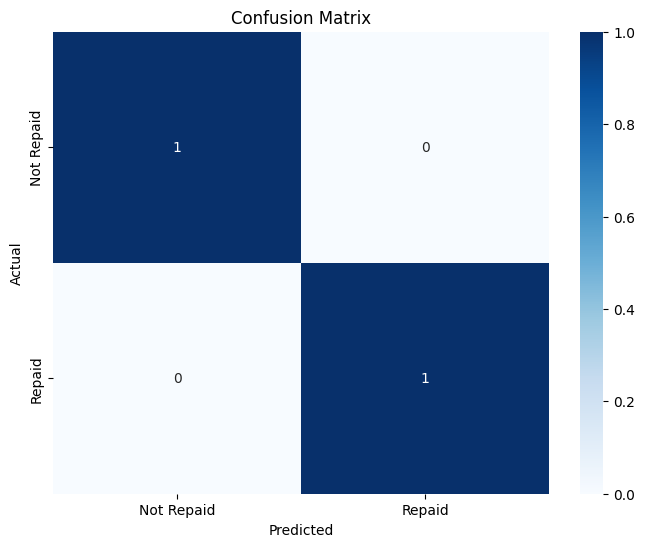

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
data = pd.read_csv('lending_data.csv')

# Create dummy variables for the 'purpose' feature
data = pd.get_dummies(data, columns=['purpose'], drop_first=True)

# Prepare features (X) and target (y)
X = data.drop('loan_repaid', axis=1)  # Features
y = data['loan_repaid']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# 1. Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Repaid', 'Repaid'], yticklabels=['Not Repaid', 'Repaid'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Generate the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
